In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [ ]:
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    random_state=42)
    kmeans.fit(df_scaled)
    WCSS.append(kmeans.inertia_)

Text(0.5, 0, 'Number of clusters')

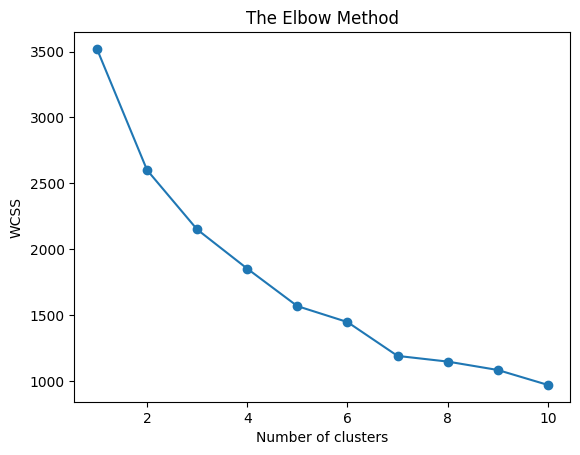

In [ ]:
plt.plot(range(1, 11), WCSS, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')

In [ ]:
kmeans = KMeans(n_clusters=6)
cluster = kmeans.fit_predict(df_scaled)

In [ ]:
cluster

array([1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 4,
       4, 0, 1, 1, 4, 4, 5, 4, 4, 4, 4, 4, 4, 1, 4, 1, 1, 0, 4, 4, 1, 5,
       1, 5, 1, 3, 1, 5, 4, 4, 1, 1, 4, 4, 5, 1, 4, 4, 1, 3, 1, 1, 4, 5,
       4, 1, 4, 4, 4, 0, 4, 1, 1, 4, 4, 5, 4, 4, 4, 1, 1, 4, 1, 3, 3, 0,
       4, 4, 4, 4, 5, 0, 1, 4, 1, 4, 4, 4, 1, 1, 1, 0, 4, 4, 1, 1, 1, 1,
       4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 0, 4, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 1, 4, 1, 1, 1, 4, 4, 5, 1, 1, 1, 4, 4, 4, 1, 5, 4, 1, 4, 1,
       4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 0, 1,
       2, 2, 5, 5, 2, 2, 2, 5, 2, 2, 2, 5, 2, 5, 2, 2, 1, 2, 5, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 5, 2, 1, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 2, 1, 1, 2, 1,

In [ ]:
df_pca = PCA(n_components=2).fit_transform(df_scaled)

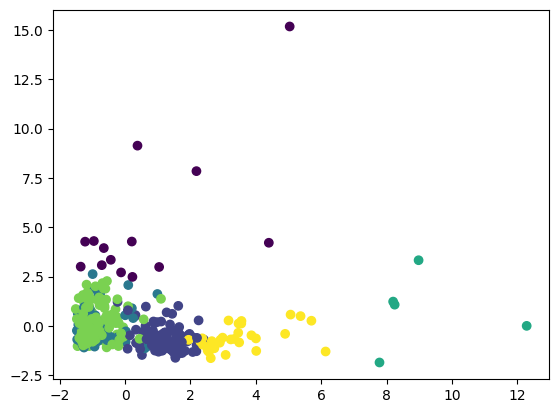

In [ ]:
plt.scatter(df_pca[:,0],df_pca[:,1],c=cluster)

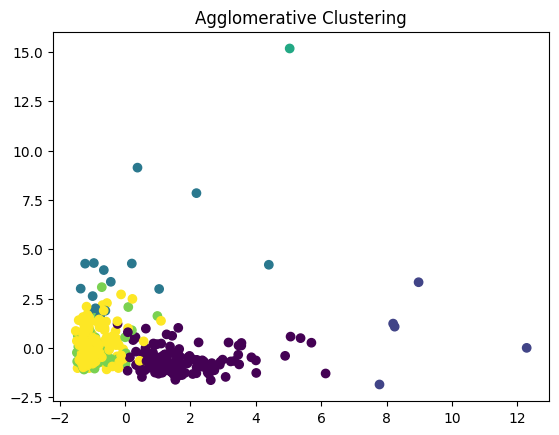

Silhouette Score (K-Means): 0.35457293145907326
Silhouette Score (Agglomerative Clustering): 0.3437882171828694


In [ ]:
# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=6)
agg_labels = agg_clustering.fit_predict(df_scaled)

# Visualize Agglomerative Clustering results
plt.scatter(df_pca[:,0], df_pca[:,1], c=agg_labels)
plt.title('Agglomerative Clustering')
plt.show()

# Compare with K-Means using Silhouette Score
kmeans_score = silhouette_score(df_scaled, cluster)
agg_score = silhouette_score(df_scaled, agg_labels)

print(f"Silhouette Score (K-Means): {kmeans_score}")
print(f"Silhouette Score (Agglomerative Clustering): {agg_score}")



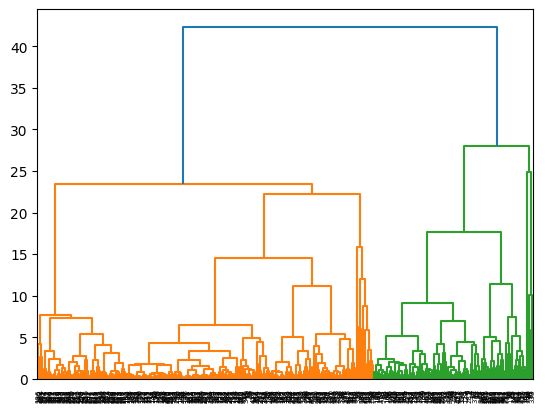

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
dendo = sch.dendrogram(sch.linkage(df_scaled,method = 'ward'))


Cluster 1:
       Channel      Region         Fresh          Milk       Grocery  \
count    101.0  101.000000    101.000000    101.000000    101.000000   
mean       2.0    2.772277   8986.930693   7397.049505  11526.594059   
std        0.0    0.545549   8636.820343   3270.284026   4613.911241   
min        2.0    1.000000     18.000000    928.000000   2743.000000   
25%        2.0    3.000000   2362.000000   5302.000000   8552.000000   
50%        2.0    3.000000   7057.000000   6939.000000  10908.000000   
75%        2.0    3.000000  12669.000000   9656.000000  13829.000000   
max        2.0    3.000000  40721.000000  16729.000000  28986.000000   

             Frozen  Detergents_Paper   Delicassen  cluster  dbscan_cluster  
count    101.000000        101.000000   101.000000    101.0      101.000000  
mean    1425.475248       4737.386139  1502.089109      1.0       -0.405941  
std     1660.383977       2204.515729  1371.230448      0.0        1.497853  
min       33.000000        

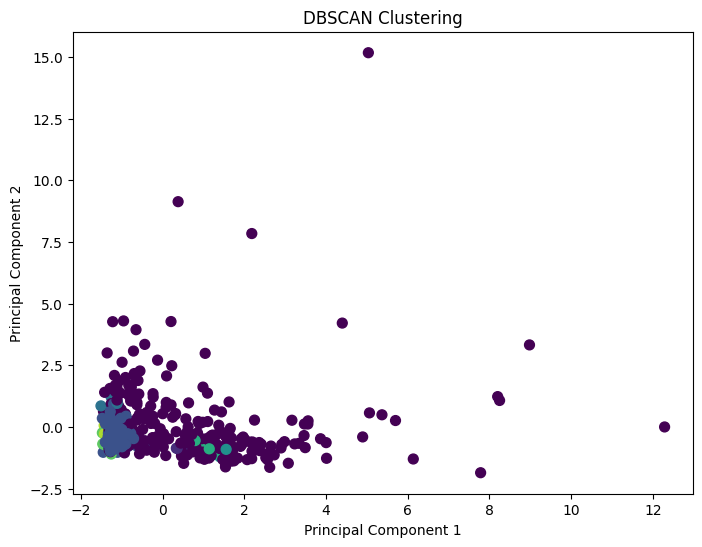

In [ ]:
from sklearn.cluster import DBSCAN

df['cluster'] = cluster
for c in df['cluster'].unique():
    print(f"\nCluster {c}:")
    print(df[df['cluster'] == c].describe())


print("\nComparison with Channel feature:")
print(pd.crosstab(df['cluster'], df['Channel']))


# Try DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Evaluate DBSCAN
dbscan_score = silhouette_score(df_scaled, dbscan_labels)
print(f"\nSilhouette Score (DBSCAN): {dbscan_score}")

# Analyze DBSCAN clusters (similar to K-Means analysis)
df['dbscan_cluster'] = dbscan_labels
for c in df['dbscan_cluster'].unique():
    if c != -1:  # Ignore noise points
        print(f"\nDBSCAN Cluster {c}:")
        print(df[df['dbscan_cluster'] == c].describe())

# Compare with Channel feature (DBSCAN)
print("\nComparison with Channel feature (DBSCAN):")
print(pd.crosstab(df['dbscan_cluster'], df['Channel']))


df_pca_dbscan = PCA(n_components=2).fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_dbscan[:, 0], df_pca_dbscan[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



